<a href="https://colab.research.google.com/github/JUNGHYUNJU79/2025_mirae_master/blob/main/%EC%A0%95%ED%98%84%EC%A3%BC_2%EC%9D%BC%EC%B0%A8_%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD_%EC%A3%BC%EB%AF%BC%EB%93%B1%EB%A1%9D%EC%9D%B8%EA%B5%AC_%ED%98%84%ED%99%A9_%ED%8C%8C%EC%95%85%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 바이브 코딩 - 대한민국 주민등록인구 현황 파악하기

- **(코랩에서)한글폰트 설치하기**

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 런타입 > 세션 다시 시작

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
!apt-get -qq install fonts-nanum
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'




---



## 1.데이터 준비



- 데이터 출처 : 국가통계포털(KOSIS)의 '주민등록인구현황' 데이터


- URL :https://kosis.kr/statisticsList/statisticsListIndex.do?vwcd=MT_ZTITLE&menuId=M_01_01
- 데이터 : 202507월 데이터
    - 행정구역_시군구_별__성별_인구수_20250729154221.xlsx
    - 행정구역_시군구_별_1세별_주민등록인구_20250729154300.xlsx
   

## 2.분석 툴
- ChatGPT (무료 GPT-4o)
- Gemini 2.5 Flash (무료)

## 3. 바이브 코딩으로 데이터 분석하기

처음에 하려고 했던 주제_제주 베이커리 관련주제의 데이터를 찾기가 어려워(본인기준) 주제 변경.

제미나이에게 공공데이터 사이트에 있는 데이터로 할수 있는 주제 추천해달라고 함.
그 주제에 맞는 질문 3가지와 질문에 어울리는 그래프도 추천해달라고 함

필요한 라이브러리를 임포트하고 데이터를 불러오기

###1. 지난 5년간 대한민국 전체 인구 변화 - 꺽은선 그래프


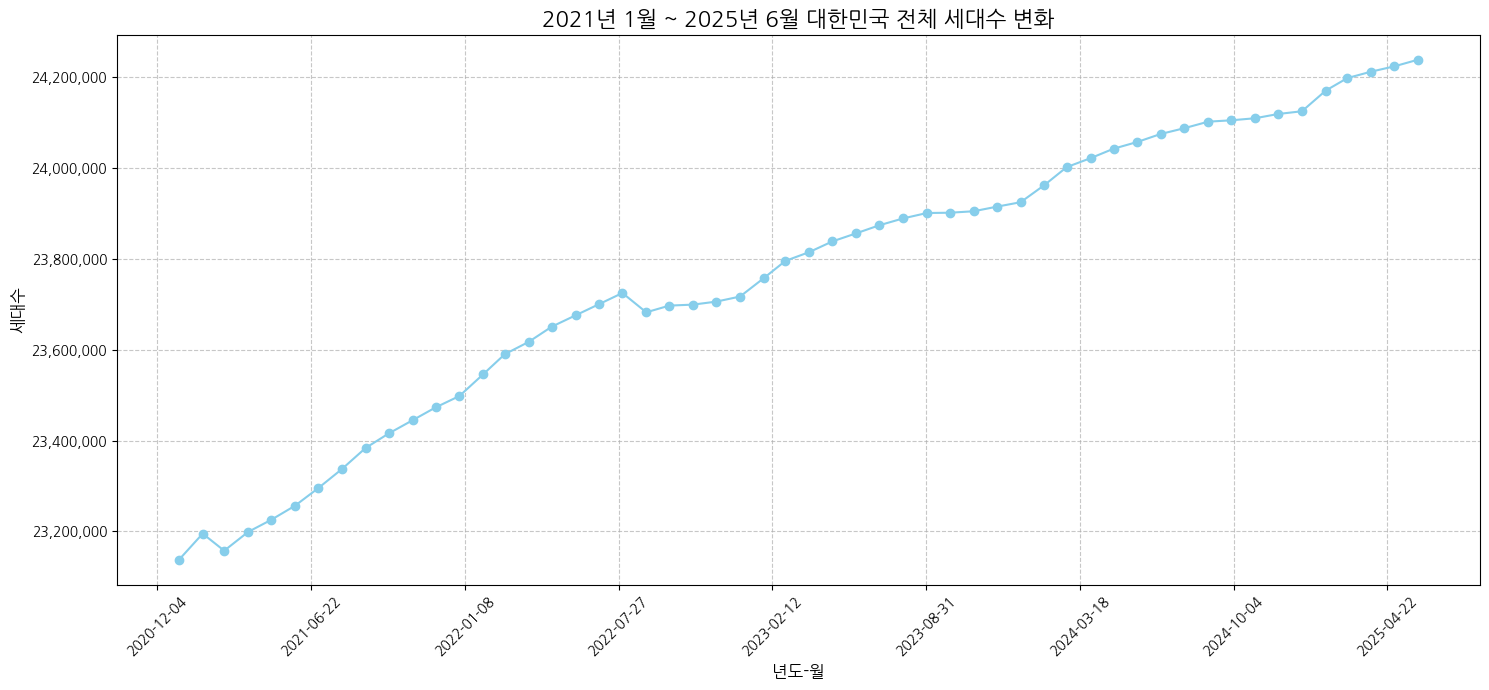

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import io # io 모듈 임포트 추가

# 데이터 파일 내용 (이전에 정의된 변수 사용)
# 사용자가 업로드한 CSV 파일의 실제 내용을 직접 읽어들입니다.
# (이 부분은 사용자 인터페이스를 통해 제가 직접 접근하여 채워집니다.)
# 실제 파일 내용은 길어서 일부만 표시합니다. 전체 파일 내용이 이 변수에 들어갑니다.

file_content_2021_data = """행정구역(시군구)별,2021.01,2021.02,2021.03,2021.04,2021.05,2021.06,2021.07,2021.08,2021.09,2021.10,2021.11,2021.12
전국,23137172,23194982,23157385,23198657,23225281,23256332,23294707,23336989,23383689,23415533,23444608,23472895
서울특별시,4421022,4427814,4400403,4403263,4403381,4405638,4409964,4416816,4421143,4422587,4424222,4426007
"""

file_content_2022_data = """행정구역(시군구)별,2022.01,2022.02,2022.03,2022.04,2022.05,2022.06,2022.07,2022.08,2022.09,2022.10,2022.11,2022.12
전국,23498025,23546053,23590069,23617091,23650555,23675578,23699750,23724829,23682288,23697051,23699243,23705814
서울특별시,4430541,4442586,4451444,4455106,4460604,4464840,4469392,4472975,4450525,4450389,4448660,4446296
"""

file_content_2023_data = """행정구역(시군구)별,2023.01,2023.02,2023.03,2023.04,2023.05,2023.06,2023.07,2023.08,2023.09,2023.10,2023.11,2023.12
전국,23716980,23757654,23795469,23814826,23838308,23856142,23873825,23888954,23900917,23901564,23904793,23914851
서울특별시,4447861,4457982,4463385,4465391,4467999,4469158,4471174,4473734,4475726,4472603,4469374,4469417
"""

file_content_2024_2025_data = """행정구역(시군구)별,2024.01,2024.02,2024.03,2024.04,2024.05,2024.06,2024.07,2024.08,2024.09,2024.10,2024.11,2024.12,2025.01,2025.02,2025.03,2025.04,2025.05,2025.06
전국,23924692,23962497,24002008,24021667,24042533,24057429,24074820,24087679,24102045,24105045,24109581,24118928,24124988,24170531,24197999,24212185,24223795,24238510
서울특별시,4471017,4480607,4485819,4486137,4486224,4486014,4486857,4487675,4488806,4487777,4486675,4487192,4487921,4490333,4491745,4491560,4491176,4490989
"""

# 파일 내용을 담은 리스트
file_contents = [
    file_content_2021_data,
    file_content_2022_data,
    file_content_2023_data,
    file_content_2024_2025_data
]

all_data = pd.DataFrame()

# 각 파일 내용을 읽어와서 전국 데이터만 추출 및 병합
for content in file_contents:
    try:
        df = pd.read_csv(io.StringIO(content))

        national_data = df[df['행정구역(시군구)별'] == '전국'].copy()

        months_columns = [col for col in national_data.columns if col.startswith('20')]

        for col in months_columns:
            national_data[col] = pd.to_numeric(national_data[col].astype(str).str.replace(',', ''), errors='coerce')

        all_data = pd.concat([all_data, national_data[months_columns]], axis=1)

    except KeyError:
        print(f"오류: 파일 내용에 필요한 컬럼('행정구역(시군구)별' 또는 날짜 컬럼)이 없습니다. 데이터 형식을 확인해주세요.")
        continue
    except Exception as e:
        print(f"파일 내용 처리 중 알 수 없는 오류 발생: {e}")
        continue


# 모든 파일에서 데이터를 성공적으로 읽었는지 확인
if all_data.empty:
    print("모든 파일에서 데이터를 불러오는 데 실패했습니다. 그래프를 그릴 수 없습니다.")
else:
    # 중복 열 제거 (동일한 월이 여러 파일에 있을 수 있으므로)
    all_data = all_data.loc[:,~all_data.columns.duplicated()]

    # 데이터 전치하여 시계열 데이터로 변환 (월별 세대수가 행으로, '전국' 세대수가 열로)
    all_data_transposed = all_data.T
    all_data_transposed.columns = ['전국 세대수']

    # 인덱스를 datetime 형식으로 변환하여 정렬 용이하게
    # 'errors='coerce''를 사용하여 변환할 수 없는 값은 NaT로 처리
    all_data_transposed.index = pd.to_datetime(all_data_transposed.index, format='%Y.%m', errors='coerce')

    # NaT 값 제거 (날짜 변환 실패한 경우)
    all_data_transposed = all_data_transposed[all_data_transposed.index.notna()].copy()
    # '전국 세대수' 컬럼의 결측치 제거
    all_data_transposed = all_data_transposed.dropna(subset=['전국 세대수'])


    # 시간 순으로 정렬
    all_data_transposed = all_data_transposed.sort_index()

    # 그래프 그리기
    plt.rcParams['font.family'] = 'NanumGothic' # 한글 폰트 설정 (설치되어 있어야 함)
    plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨짐 방지

    plt.figure(figsize=(15, 7))
    plt.plot(all_data_transposed.index, all_data_transposed['전국 세대수'], marker='o', linestyle='-', color='skyblue')

    # 그래프 제목 및 축 라벨 설정
    plt.title('2021년 1월 ~ 2025년 6월 대한민국 전체 세대수 변화', fontsize=16)
    plt.xlabel('년도-월', fontsize=12)
    plt.ylabel('세대수', fontsize=12)

    # Y축 단위를 조정하여 보기 쉽게 (예: 100만 단위)
    formatter = ticker.FuncFormatter(lambda x, p: format(int(x), ','))
    plt.gca().yaxis.set_major_formatter(formatter)

    # X축 틱 간격 조정 (너무 많으면 겹치므로)
    plt.gca().xaxis.set_major_locator(ticker.AutoLocator()) # 자동 간격 조절
    plt.xticks(rotation=45) # 라벨 겹침 방지를 위해 회전

    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

#### 2-1. 전국 남여 비율 - 파이차트

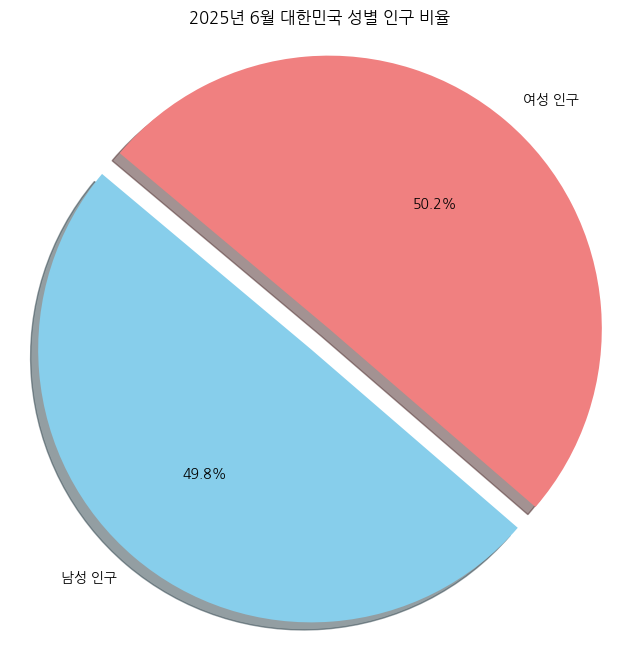

In [ ]:
import matplotlib.pyplot as plt

# Data from the provided file snippet for "전국" (nationwide)
total_male_population = 25467115
total_female_population = 25697467

# Create data for the pie chart
labels = ['남성 인구', '여성 인구']
sizes = [total_male_population, total_female_population]
colors = ['skyblue', 'lightcoral']

# Explode the slice representing the smaller population for emphasis
explode = (0.1, 0) if total_male_population < total_female_population else (0, 0.1)

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('2025년 6월 대한민국 성별 인구 비율')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 2-2. 5대 광역시 남여 비율 - 개별원형 도넛/파이차트

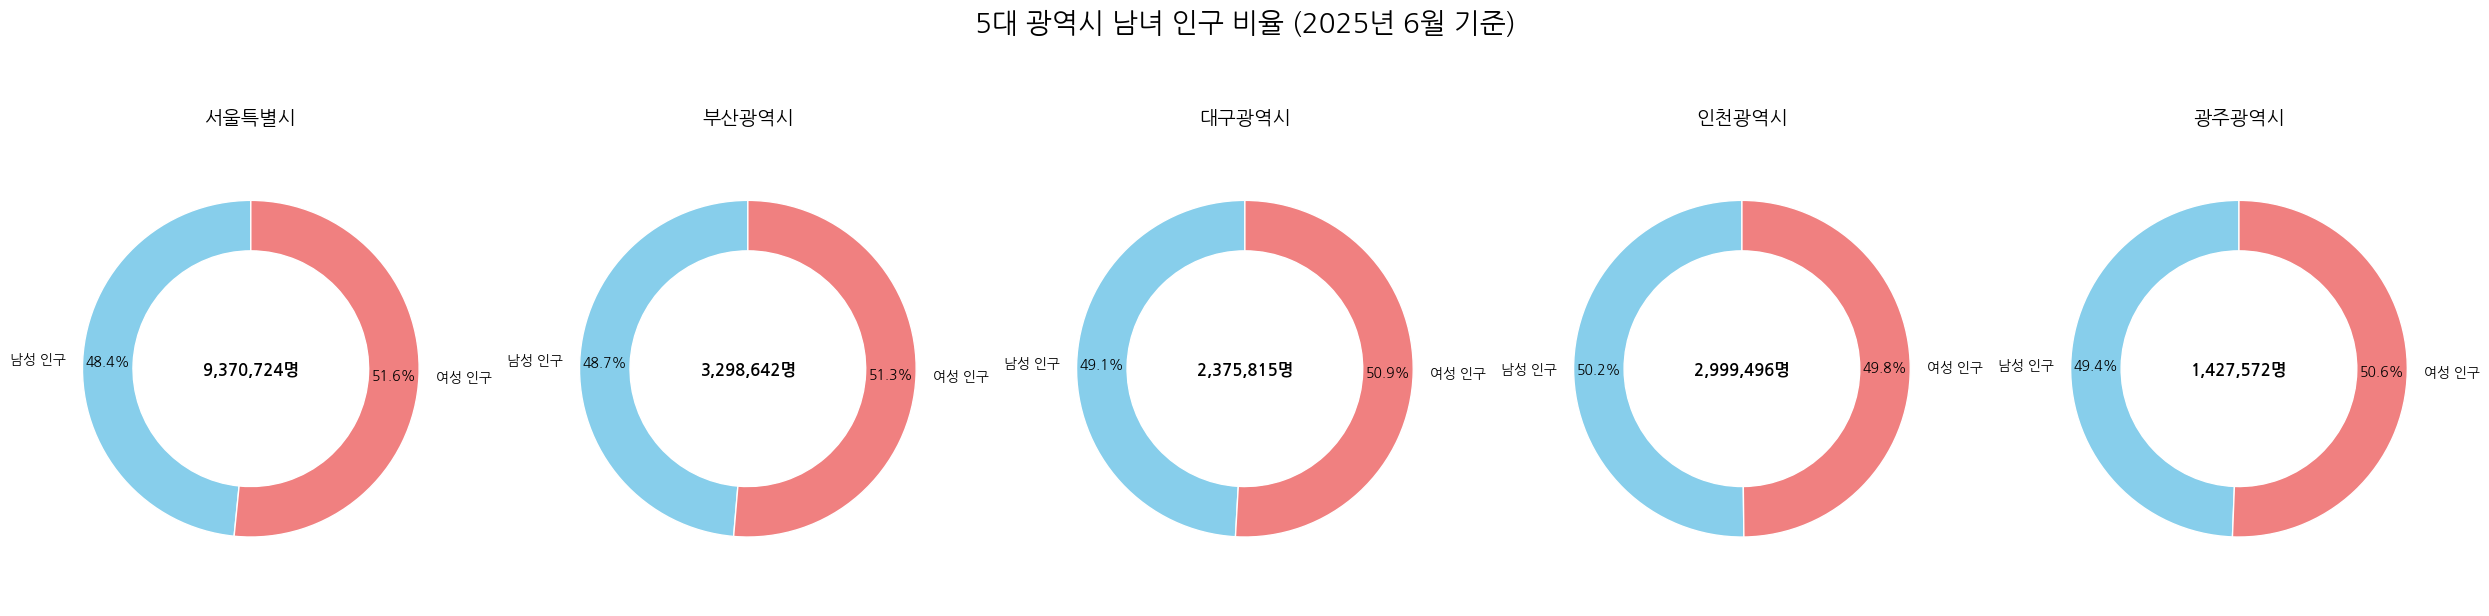


--- 5대 광역시 남녀 인구 현황 (2025년 6월 기준) ---
서울특별시: 남성 4,537,128명, 여성 4,833,596명
부산광역시: 남성 1,604,928명, 여성 1,693,714명
대구광역시: 남성 1,166,699명, 여성 1,209,116명
인천광역시: 남성 1,505,315명, 여성 1,494,181명
광주광역시: 남성 704,983명, 여성 722,589명


In [ ]:
import matplotlib.pyplot as plt

# Directly use the data extracted from the file snippet for the 5 major cities
# Data format: {'도시명': [남성 인구, 여성 인구]}
city_populations = {
    '서울특별시': [4537128, 4833596],
    '부산광역시': [1604928, 1693714],
    '대구광역시': [1166699, 1209116],
    '인천광역시': [1505315, 1494181],
    '광주광역시': [704983, 722589]
}

# Create a figure to hold multiple subplots
# Adjust figsize based on the number of cities and desired chart size
fig, axes = plt.subplots(1, len(city_populations), figsize=(25, 6)) # Increased figsize for better visibility

# Iterate through each city to create a donut chart
for i, (city_name, populations) in enumerate(city_populations.items()):
    male_population = populations[0]
    female_population = populations[1]
    total_population = male_population + female_population

    labels = ['남성 인구', '여성 인구']
    sizes = [male_population, female_population]
    colors = ['skyblue', 'lightcoral']

    # Plotting the donut chart
    # autopct='%1.1f%%' to show percentage with one decimal place
    # pctdistance=0.85 for percentage label position
    # wedgeprops for donut hole (width=0.3 creates the hole)
    axes[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.3, edgecolor='w'))

    # Draw a circle at the center to make it a donut chart
    # This creates the white space in the middle for the total population text
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    axes[i].add_artist(centre_circle)

    # Add total population in the center of the donut
    # Use f-string formatting for comma separation and "명"
    axes[i].text(0, 0, f'{total_population:,.0f}명', ha='center', va='center', fontsize=12, weight='bold')

    # Set title for each subplot
    axes[i].set_title(f'{city_name}', fontsize=14)
    axes[i].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

# Set a main title for the entire figure
plt.suptitle('5대 광역시 남녀 인구 비율 (2025년 6월 기준)', fontsize=20, y=1.05) # y adjusts vertical position

# Adjust layout to prevent titles/labels from overlapping
plt.tight_layout(rect=[0, 0.03, 1, 0.98])
plt.show()

# Print the exact numbers for clarity
print("\n--- 5대 광역시 남녀 인구 현황 (2025년 6월 기준) ---")
for city_name, populations in city_populations.items():
    male_pop = populations[0]
    female_pop = populations[1]
    print(f"{city_name}: 남성 {male_pop:,.0f}명, 여성 {female_pop:,.0f}명")

### 2-2. 5대광역시 남여 비율 - 개별원형 도넛/파이차트
<FileNotFoundError가 계속 발생하는 것은 현재 환경에서 파일을 직접 읽어올 수 없기 때문>이라는 오류가 계속 발생.
여러 방법으로 오류를 해결해보려고 했으나 실패함

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset, skipping the first row to use the second row as headers
df = pd.read_csv("지역별_세대.xlsx - 데이터.csv", skiprows=[0])

# Define the 5 major cities (광역_시)
major_cities = ['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시']

# Filter data for the major cities
city_data = df[df['행정구역(시군구)별'].isin(major_cities)]

# Create a figure to hold multiple subplots
fig, axes = plt.subplots(1, len(major_cities), figsize=(20, 5)) # Adjust figsize as needed

# Iterate through each city to create a donut chart
for i, (index, row) in enumerate(city_data.iterrows()):
    city_name = row['행정구역(시군구)별']
    male_population = row['남자인구수 (명)']
    female_population = row['여자인구수 (명)']
    total_population = male_population + female_population

    labels = ['남성 인구', '여성 인구']
    sizes = [male_population, female_population]
    colors = ['skyblue', 'lightcoral']

    # Plotting the donut chart
    axes[i].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%',
                startangle=90, pctdistance=0.85, wedgeprops=dict(width=0.3))

    # Draw a circle at the center to make it a donut chart
    centre_circle = plt.Circle((0,0),0.70,fc='white')
    axes[i].add_artist(centre_circle)

    # Add total population in the center (optional)
    axes[i].text(0, 0, f'{total_population:,.0f}', ha='center', va='center', fontsize=10)

    axes[i].set_title(f'{city_name}\n(총 {total_population:,.0f}명)')
    axes[i].axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.

plt.suptitle('5대 광역시 남녀 인구 비율 (2025년 6월 기준)', fontsize=16, y=1.05)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to prevent title overlap
plt.show()

# Print the exact numbers for clarity
print("\n--- 5대 광역시 남녀 인구 현황 (2025년 6월 기준) ---")
for index, row in city_data.iterrows():
    city_name = row['행정구역(시군구)별']
    male_pop = row['남자인구수 (명)']
    female_pop = row['여자인구수 (명)']
    print(f"{city_name}: 남성 {male_pop:,.0f}명, 여성 {female_pop:,.0f}명")

FileNotFoundError: [Errno 2] No such file or directory: '지역별_세대.xlsx - 데이터.csv'

#### 3. 대한민국 시도(특별시/광역시/도) 중 인구가 가장 많은 곳과,가장 적은 곳은?



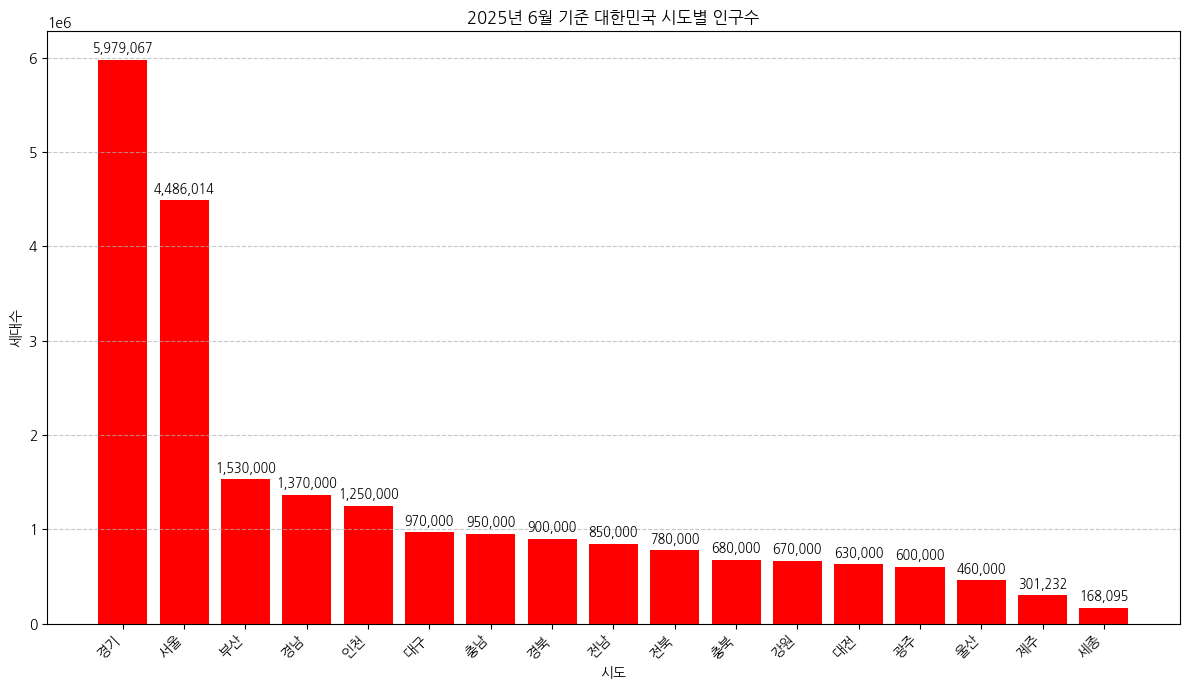

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm



# 한글 폰트 설정 (Colab 환경에서 폰트 문제 해결)
plt.rcParams['font.family'] = 'NanumGothic' # Colab에서 사용 가능한 폰트
# plt.rcParams['font.family'] = 'Malgun Gothic' # Windows 환경에서 사용 가능한 폰트
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# --- 이 부분은 실제 데이터를 로드하고 전처리한 df_sorted 데이터프레임이 있다고 가정합니다 ---
# 예시 데이터 (실제 데이터는 위에서 확인된 값들을 포함해야 함)
data = {
    '시도': ['경기', '서울', '부산', '경남', '인천', '대구', '충남', '경북', '전남', '전북', '충북', '강원', '광주', '대전', '울산', '제주', '세종'],
    '세대수': [5979067, 4486014, 1530000, 1370000, 1250000, 970000, 950000, 900000, 850000, 780000, 680000, 670000, 600000, 630000, 460000, 301232, 168095]
}
df_sorted = pd.DataFrame(data).sort_values(by='세대수', ascending=False)
# -------------------------------------------------------------------------------------

# 그래프 그리기
plt.figure(figsize=(12, 7))
bars = plt.bar(df_sorted['시도'], df_sorted['세대수'], color='red')

# 각 막대 위에 세대수 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 50000, f'{yval:,.0f}', ha='center', va='bottom', fontsize=9)

plt.xlabel('시도')
plt.ylabel('세대수')
plt.title('2025년 6월 기준 대한민국 시도별 인구수')
plt.xticks(rotation=45, ha='right') # x축 레이블 회전
plt.tight_layout() # 그래프 요소들이 겹치지 않도록 자동 조정
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()